##Experiment 3

Aim: Multiple Linear Regression in Python and R

Tasks performed :
List the packages to be used for Multiple Linear Regression in Python

 * Downloaded the dataset from Kaggle

 * Load data into Google Colab

* Display the summary of the dataset

* Created a model and fit it

* Get the values : Coefficient of Determination, Intercept and Coefficients

* Predict the response

* Visualize the results with a graph

* Repeat the steps 2 to 6 using R libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [89]:
df = pd.read_csv('/content/Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [90]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [91]:
X=df.iloc[:,:-1]
y=df.iloc[:, -1]

<Axes: xlabel='number_courses', ylabel='Marks'>

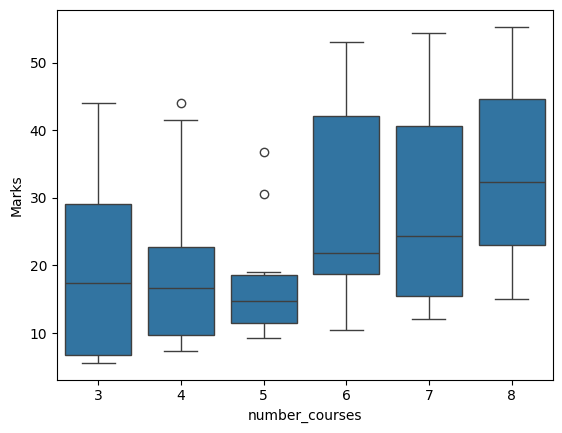

In [92]:
sns.boxplot(x='number_courses', y='Marks', data=df)

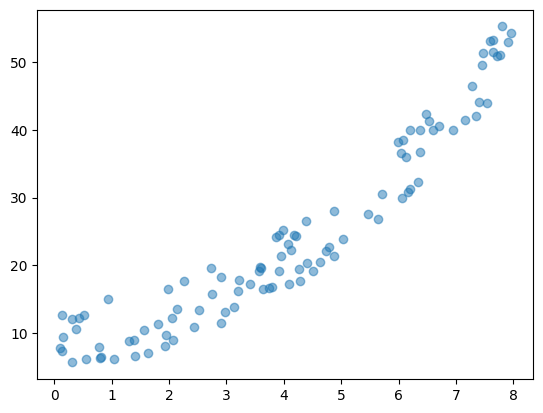

In [93]:
plt.scatter(x='time_study', y='Marks', data=df, alpha=0.5)

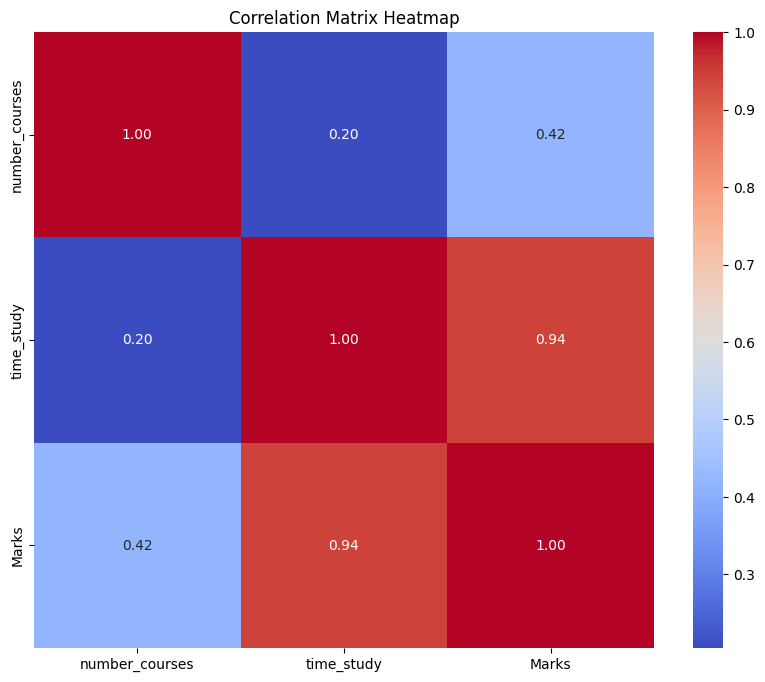

In [94]:
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()


In [95]:
X_train ,X_test , y_train ,y_test =train_test_split(X,y,test_size=0.2,random_state=100)

In [96]:
X1_test = X_test['number_courses']
X2_test = X_test['time_study']
X1_train = X_train['number_courses']
X2_train = X_train['time_study']

In [97]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [98]:
y_pred= model.predict(X_test)

In [99]:
r2Score=r2_score(y_test,y_pred)

In [100]:
r2Score

0.9381738467744821

In [101]:
model.coef_

array([1.89509522, 5.47780621])

In [102]:
model.intercept_

-8.062064277340234

In [103]:
df1=pd.DataFrame({"number_courses": X_test['number_courses'],"time_study": X_test['time_study'],"Actual":y_test,"Predicted":y_pred})

In [104]:
df1.head()

,number_courses,time_study,Actual,Predicted
37,6,7.283,46.453,43.203370
62,6,3.606,19.590,23.061476
26,7,0.508,12.647,7.986328
41,6,2.754,15.725,18.394385
35,3,7.543,43.978,38.942314


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


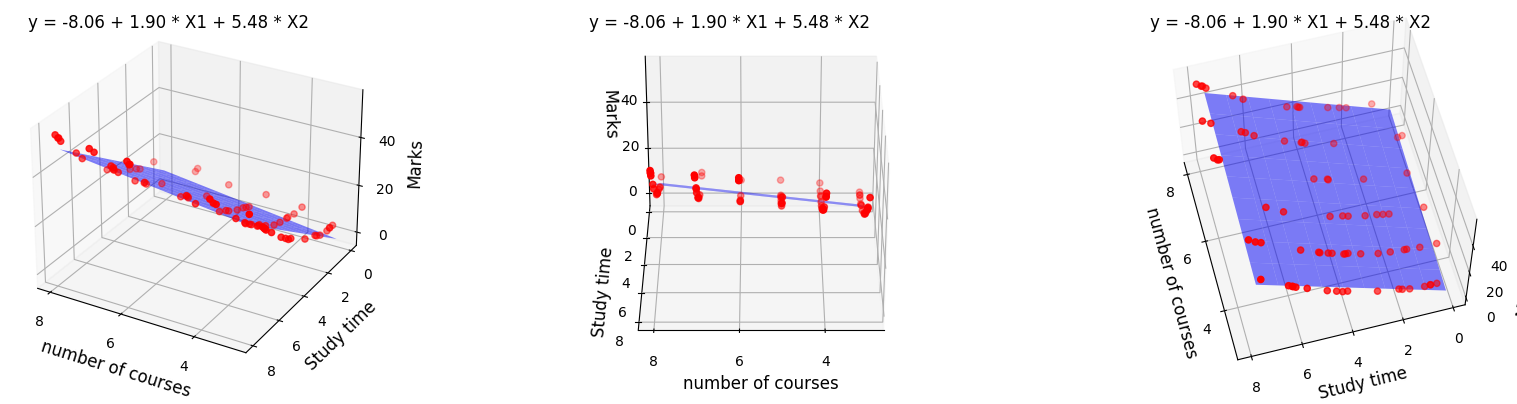

In [105]:
fig = plt.figure(figsize=(18, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    # Plot the regression plane
    x1_grid, x2_grid = np.meshgrid(np.linspace(X1_test.min(), X1_test.max(), 10),
                                   np.linspace(X2_test.min(), X2_test.max(), 10))
    X_plane = np.c_[x1_grid.flatten(), x2_grid.flatten()]
    y_plane = model.predict(X_plane)
    y_plane = y_plane.reshape(x1_grid.shape)
    ax.plot_surface(x1_grid, x2_grid, y_plane, alpha=0.5, color='blue', label='Regression Plane')

    # Plot the training data
    ax.scatter(X1_train, X2_train, y_train, color='red', label='Training Data')

    # Set labels and parameters
    ax.set_xlabel('number of courses', fontsize=12)
    ax.set_ylabel('Study time', fontsize=12)
    ax.set_zlabel('Marks', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='y')
    ax.locator_params(nbins=5, axis='z')

    equation = f'y = {model.intercept_:.2f} + {model.coef_[0]:.2f} * X1 + {model.coef_[1]:.2f} * X2'
    ax.text2D(0.05, 0.95, equation, fontsize=12, transform=ax.transAxes)


ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=30, azim=90)
ax3.view_init(elev=60, azim=165)


fig.tight_layout()
plt.show()


##R

In [7]:
install.packages('caTools')
install.packages("plot3D")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘misc3d’




In [21]:
library(caTools)
library(plot3D)

In [30]:
data <- read.csv("/content/Student_Marks.csv")

In [34]:
summary(data)

 number_courses   time_study        Marks       
 Min.   :3.00   Min.   :0.096   Min.   : 5.609  
 1st Qu.:4.00   1st Qu.:2.058   1st Qu.:12.633  
 Median :5.00   Median :4.022   Median :20.059  
 Mean   :5.29   Mean   :4.077   Mean   :24.418  
 3rd Qu.:7.00   3rd Qu.:6.179   3rd Qu.:36.676  
 Max.   :8.00   Max.   :7.957   Max.   :55.299  

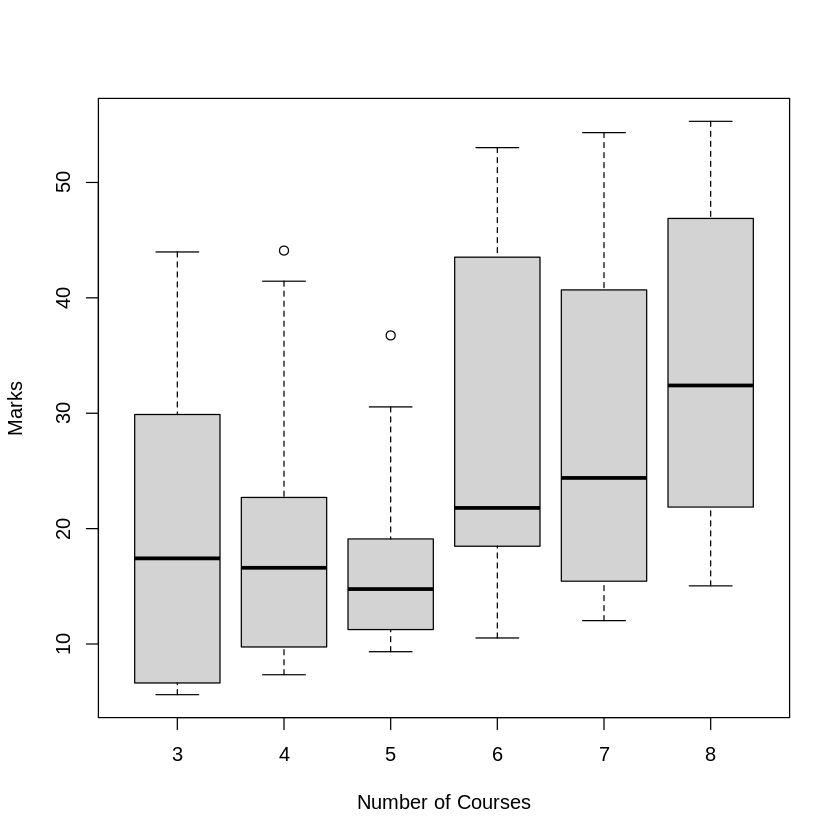

In [37]:

boxplot(Marks ~ number_courses, data = data, xlab = "Number of Courses", ylab = "Marks")


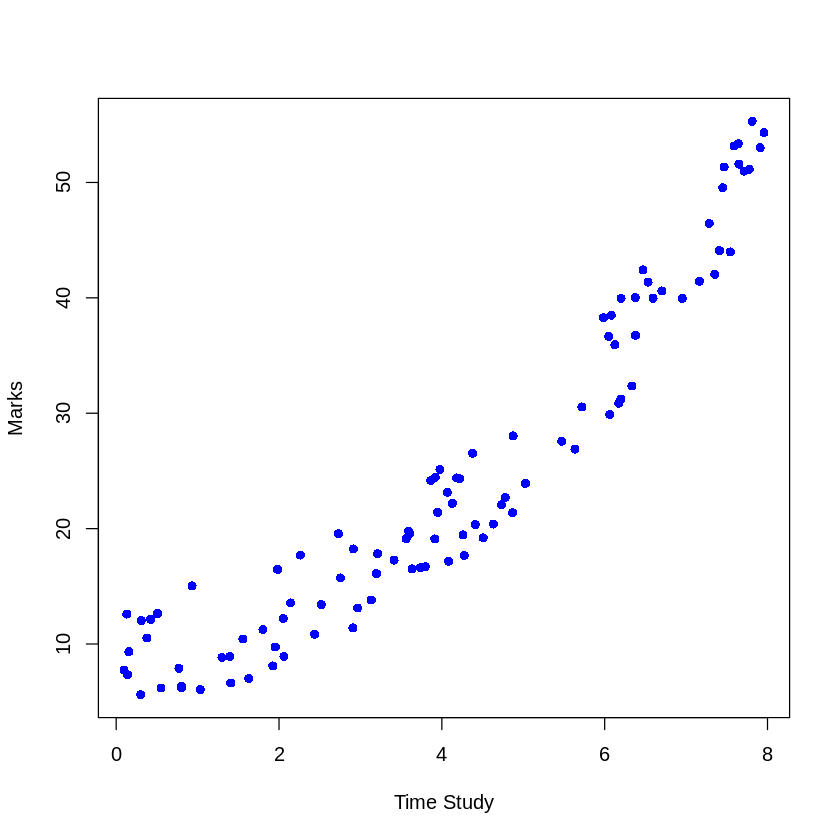

In [40]:

plot(data$time_study, data$Marks, xlab = "Time Study", ylab = "Marks", pch = 16, col = "blue")


In [42]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



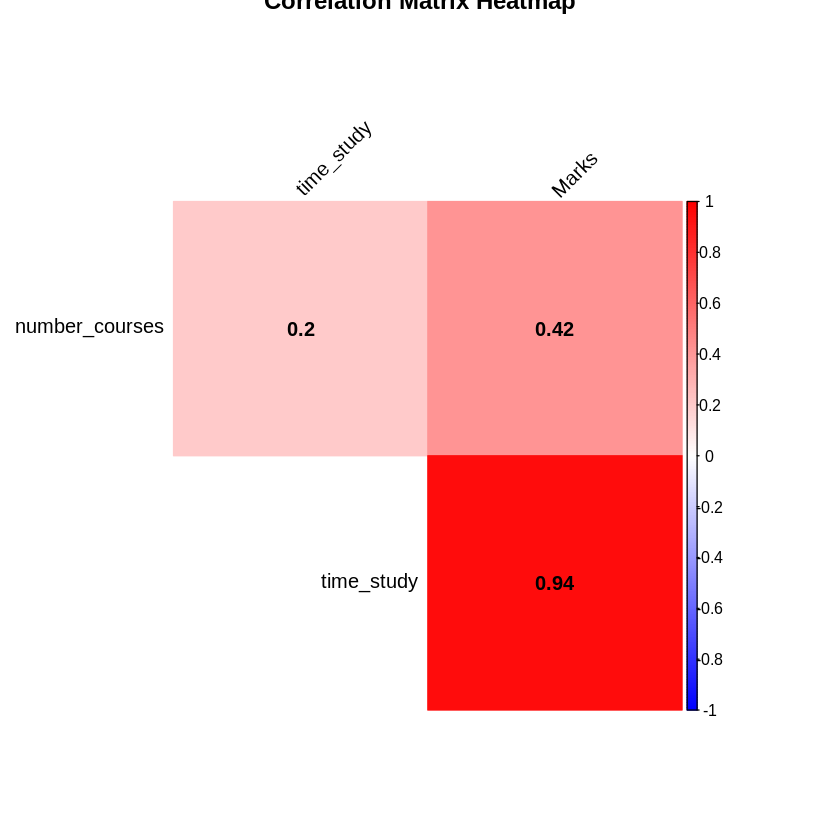

In [44]:

library(corrplot)


corr <- cor(data)

corrplot(corr, method = "color", type = "upper", order = "hclust",
          col = colorRampPalette(c("blue", "white", "red"))(200),
          addCoef.col = "black",
          tl.col = "black", tl.srt = 45,
          diag = FALSE,
          title = "Correlation Matrix Heatmap")


In [23]:
set.seed(123)
split <- sample.split(data$Marks, SplitRatio = 0.7)
train_data <- subset(data, split == TRUE)
test_data <- subset(data, split == FALSE)


In [24]:
model <- lm(Marks ~ number_courses + time_study, data = train_data)

In [26]:
predictions <- predict(model, newdata = test_data)

In [27]:
rmse <- sqrt(mean((test_data$Marks - predictions)^2))
rmse


[1] 3.947339

In [28]:
# Adding Regression Plane
x_range <- range(train_data$number_courses)
y_range <- range(train_data$time_study)
x_grid <- seq(min(x_range), max(x_range), length.out = 50)
y_grid <- seq(min(y_range), max(y_range), length.out = 50)
z_grid <- outer(x_grid, y_grid, function(x, y) predict(model, newdata = data.frame(number_courses = x, time_study = y)))

# Create meshgrid
mesh <- mesh(x_grid, y_grid)


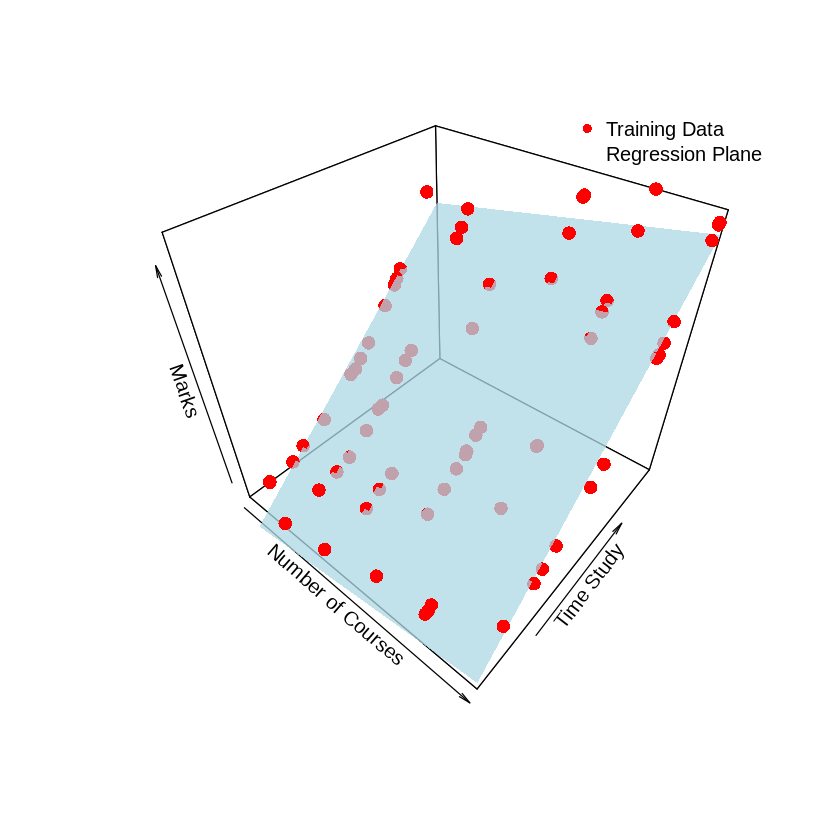

In [29]:
# 3D Scatter Plot with Training Data
scatter3D(train_data$number_courses, train_data$time_study, train_data$Marks,
           pch = 16, col = "red", cex = 1.5,
           xlab = "Number of Courses", ylab = "Time Study", zlab = "Marks")

# Add Regression Plane
surf3D(x = mesh$x, y = mesh$y, z = z_grid,
       add = TRUE, colvar = z_grid, col = "lightblue",
       xlab = "Number of Courses", ylab = "Time Study", zlab = "Marks",
       alpha = 0.5)

# Add legend
legend("topright", legend = c("Training Data", "Regression Plane"), pch = c(16, NA), col = c("red", "lightblue"), bty = "n")
